In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

Epoch 30/150, Loss: 5.1904
Epoch 60/150, Loss: 0.7000
Epoch 90/150, Loss: 3.7607
Epoch 120/150, Loss: 8.4879
Epoch 150/150, Loss: 1.6492


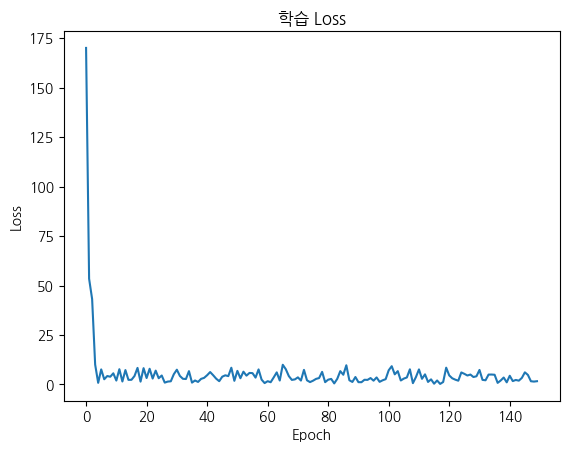

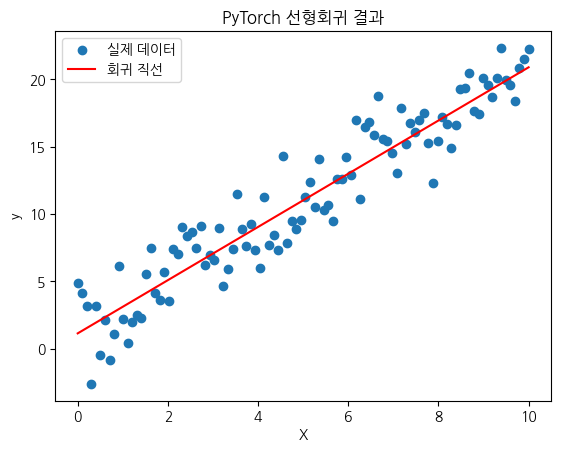

In [3]:


# 1. 데이터 생성 (y = 2*x + 1 + noise)
torch.manual_seed(42)
N = 100
X = torch.linspace(0, 10, N).unsqueeze(1)  # (100, 1)
y = 2 * X + 1 + torch.randn(N, 1) * 2      # 약간의 노이즈 추가

# 2. DataLoader 준비
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# 3. 선형회귀 모델 설계
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 입력 1, 출력 1

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# 4. 손실함수, 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

# 5. 학습 루프
epochs = 150
losses = []

for epoch in range(epochs):
    for batch_X, batch_y in loader:
        preds = model(batch_X)
        loss = criterion(preds, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 30 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 6. 학습 손실 그래프
plt.plot(losses)
plt.title("학습 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 7. 회귀 결과 시각화
model.eval()
with torch.no_grad():
    pred_y = model(X)

plt.scatter(X.numpy(), y.numpy(), label='실제 데이터')
plt.plot(X.numpy(), pred_y.numpy(), color='red', label='회귀 직선')
plt.xlabel('X')
plt.ylabel('y')
plt.title('PyTorch 선형회귀 결과')
plt.legend()
plt.show()
